# 1DATOS: EXPLORACIÓN Y PREPARACIÓN DE DATOS

Este notebook demuestra el funcionamiento del módulo 1datos, que se encarga de cargar, explorar y preparar los datos de retornos diarios para la optimización de carteras.

## Paso 1: Importar librerías y módulo

In [ ]:
import sys
import os
import importlib
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar módulo (los nombres que empiezan con números requieren importlib)
datos = importlib.import_module('1datos')

print("Librerías importadas correctamente")

Librerías importadas correctamente


## Paso 2: Cargar datos de retornos

In [ ]:
ruta_csv = '../data/prod_long_sharpe_u50_20260116_v5_train_dataset.csv'
retornos = datos.cargar_retornos(ruta_csv)

print(f"\nDimensiones del DataFrame: {retornos.shape}")
print(f"Primeras filas:")
print(retornos.head())
print(f"\nÚltimas filas:")
print(retornos.tail())

Datos cargados: 1760 días, 50 activos

Dimensiones del DataFrame: (1760, 50)
Primeras filas:
     asset1    asset2    asset3    asset4    asset5    asset6    asset7  \
0  0.014482  0.001804 -0.004049  0.011592  0.006422  0.005713 -0.001772   
1  0.001715 -0.002062 -0.009170 -0.006120  0.007793 -0.004029  0.008242   
2 -0.016415 -0.001549 -0.013395 -0.004101  0.003523 -0.001010 -0.002054   
3  0.003695  0.002580  0.013395 -0.004806  0.002809  0.003698  0.013568   
4 -0.000651  0.006421  0.008155  0.005491  0.003500  0.005689  0.003038   

     asset8    asset9   asset10  ...   asset41   asset42   asset43   asset44  \
0  0.004928  0.012250  0.001355  ...  0.013830  0.008159  0.005384  0.007865   
1 -0.007896 -0.003558  0.002705  ... -0.001637 -0.010346 -0.000632  0.007015   
2 -0.002127 -0.003468 -0.007455  ...  0.001309 -0.008244 -0.005705  0.004725   
3  0.000142  0.009862  0.004073  ...  0.019758  0.001654  0.004756  0.011492   
4  0.004778  0.005650  0.010111  ...  0.023143  0.003300

## Paso 3: Calcular estadísticas básicas por activo

In [ ]:
stats = datos.calcular_estadisticas_basicas(retornos)

print("Estadísticas básicas por activo:")
print(stats.head(10))

print("\nResumen estadístico:")
print(stats.describe())

Estadísticas básicas por activo:
         media_diaria  std_diaria  sharpe_historico  media_anual  std_anual
asset6       0.000533    0.006526          1.105209     0.134303   0.103600
asset36      0.000702    0.009700          1.020255     0.176903   0.153981
asset2       0.000579    0.008580          0.926320     0.145970   0.136202
asset8       0.000488    0.007383          0.880639     0.123016   0.117202
asset23      0.000477    0.008686          0.727346     0.120097   0.137890
asset13      0.000524    0.010606          0.667037     0.132113   0.168371
asset42      0.000387    0.008161          0.600629     0.097616   0.129553
asset28      0.000409    0.009011          0.582834     0.103174   0.143043
asset18      0.000319    0.006862          0.555579     0.080322   0.108929
asset16      0.000423    0.010085          0.541470     0.106489   0.160093

Resumen estadístico:
       media_diaria  std_diaria  sharpe_historico  media_anual  std_anual
count     50.000000   50.000000    

## Paso 4: Visualizar estadísticas

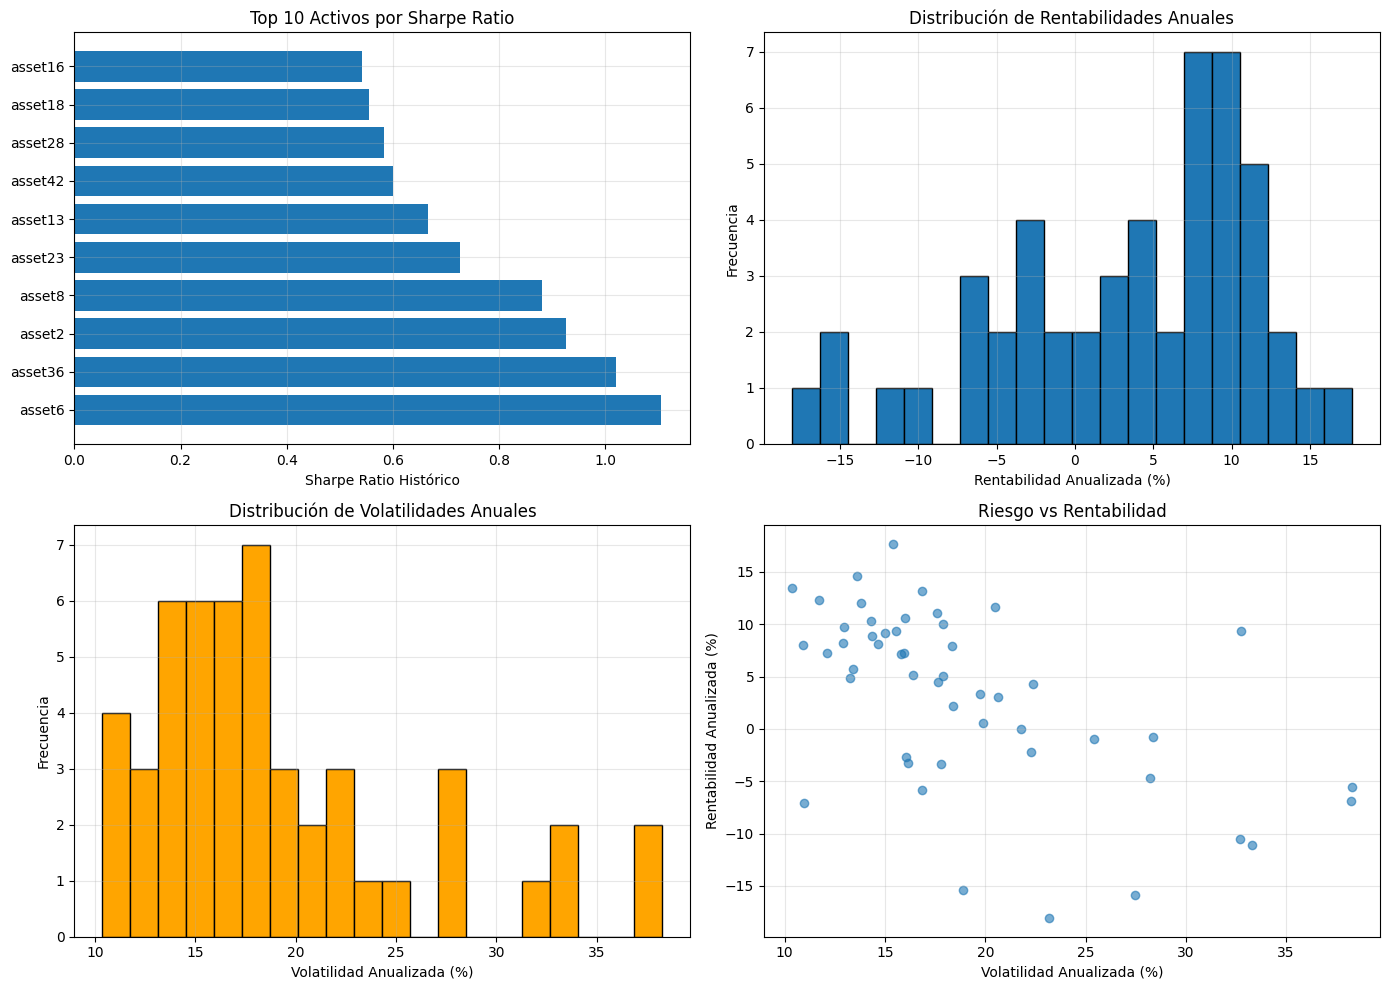

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sharpe histórico
axes[0, 0].barh(range(10), stats['sharpe_historico'].head(10).values)
axes[0, 0].set_yticks(range(10))
axes[0, 0].set_yticklabels(stats.head(10).index)
axes[0, 0].set_xlabel('Sharpe Ratio Histórico')
axes[0, 0].set_title('Top 10 Activos por Sharpe Ratio')
axes[0, 0].grid(True, alpha=0.3)

# Rentabilidad anual
axes[0, 1].hist(stats['media_anual'].values * 100, bins=20, edgecolor='black')
axes[0, 1].set_xlabel('Rentabilidad Anualizada (%)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Rentabilidades Anuales')
axes[0, 1].grid(True, alpha=0.3)

# Volatilidad anual
axes[1, 0].hist(stats['std_anual'].values * 100, bins=20, edgecolor='black', color='orange')
axes[1, 0].set_xlabel('Volatilidad Anualizada (%)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Volatilidades Anuales')
axes[1, 0].grid(True, alpha=0.3)

# Riesgo vs Rentabilidad
axes[1, 1].scatter(stats['std_anual'].values * 100, stats['media_anual'].values * 100, alpha=0.6)
axes[1, 1].set_xlabel('Volatilidad Anualizada (%)')
axes[1, 1].set_ylabel('Rentabilidad Anualizada (%)')
axes[1, 1].set_title('Riesgo vs Rentabilidad')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/modulo1_estadisticas.png', dpi=300, bbox_inches='tight')
plt.show()

## Paso 5: Analizar correlaciones entre activos

In [ ]:
stats_corr = datos.analizar_correlaciones(retornos)

print("Estadísticas de correlación:")
print(f"  Correlación media: {stats_corr['media']:.4f}")
print(f"  Correlación mínima: {stats_corr['min']:.4f}")
print(f"  Correlación máxima: {stats_corr['max']:.4f}")
print(f"  Desviación estándar: {stats_corr['std']:.4f}")

Estadísticas de correlación:
  Correlación media: 0.4093
  Correlación mínima: -0.1467
  Correlación máxima: 0.9910
  Desviación estándar: 0.2146


## Paso 6: Visualizar matriz de correlaciones

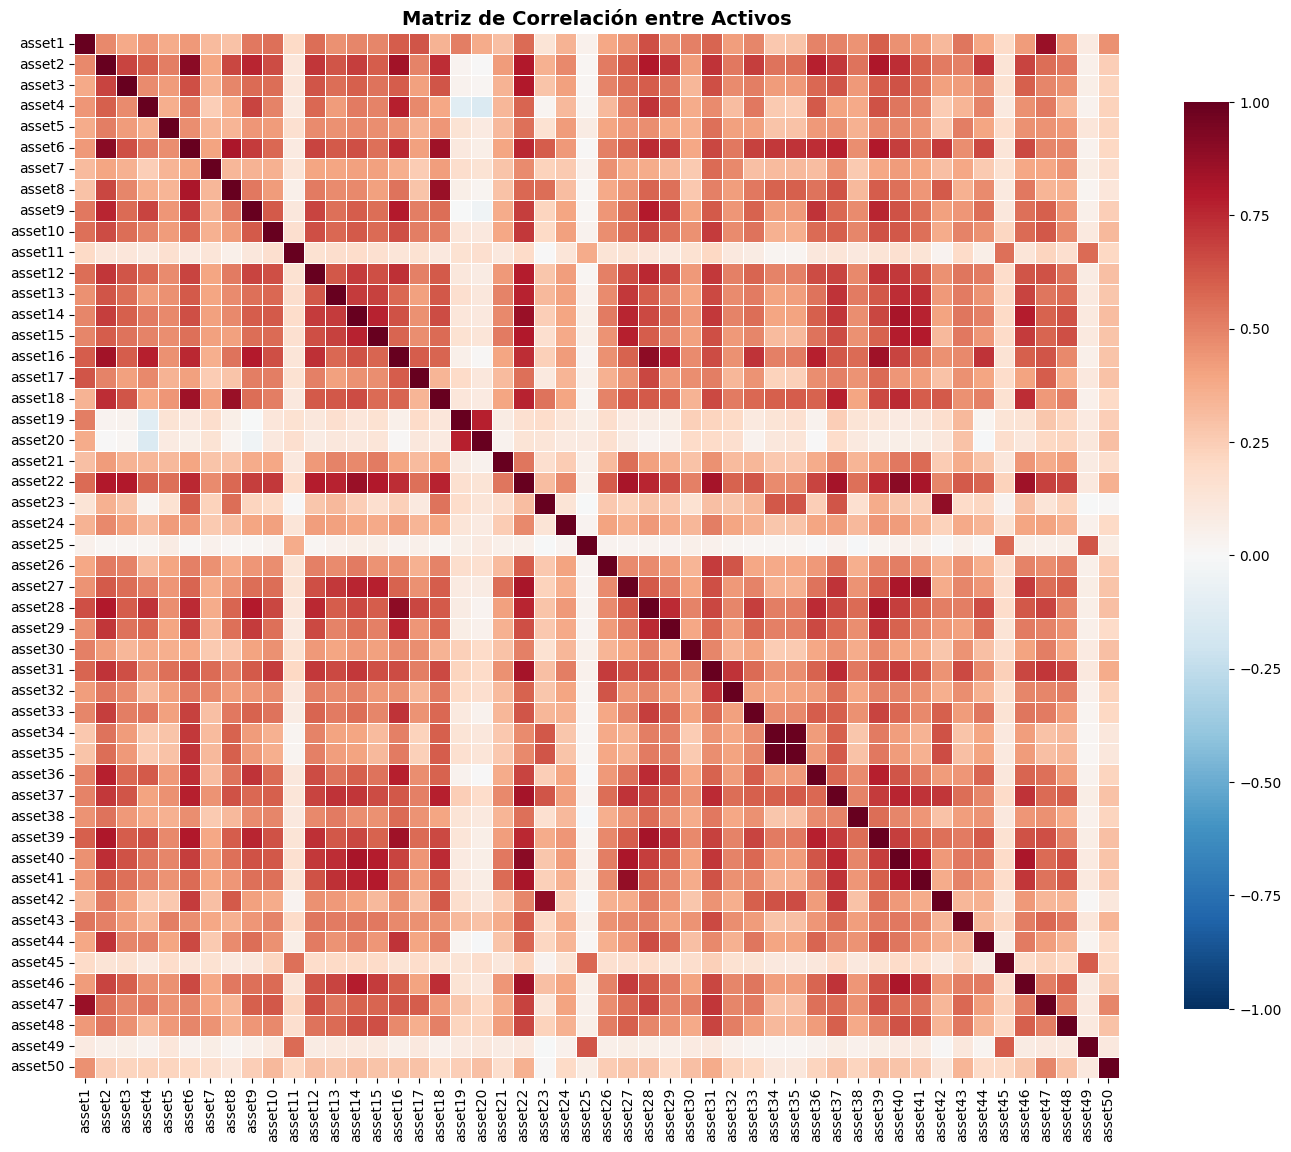

In [ ]:
fig = datos.visualizar_correlaciones(stats_corr['matriz'], ruta_guardado='outputs/modulo1_correlaciones.png')
plt.show()

## Paso 7: Análisis temporal

In [ ]:
analisis_temp = datos.analizar_temporal(retornos)

print("Análisis temporal completado")
print(f"  Retornos acumulados: {analisis_temp['retornos_acumulados'].shape}")
print(f"  Índice de mercado: {analisis_temp['indice_mercado'].shape}")
print(f"  Volatilidad rolling: {analisis_temp['volatilidad_rolling'].shape}")

Análisis temporal completado
  Retornos acumulados: (1760, 50)
  Índice de mercado: (1760,)
  Volatilidad rolling: (1760, 50)


## Paso 8: Visualizar evolución temporal

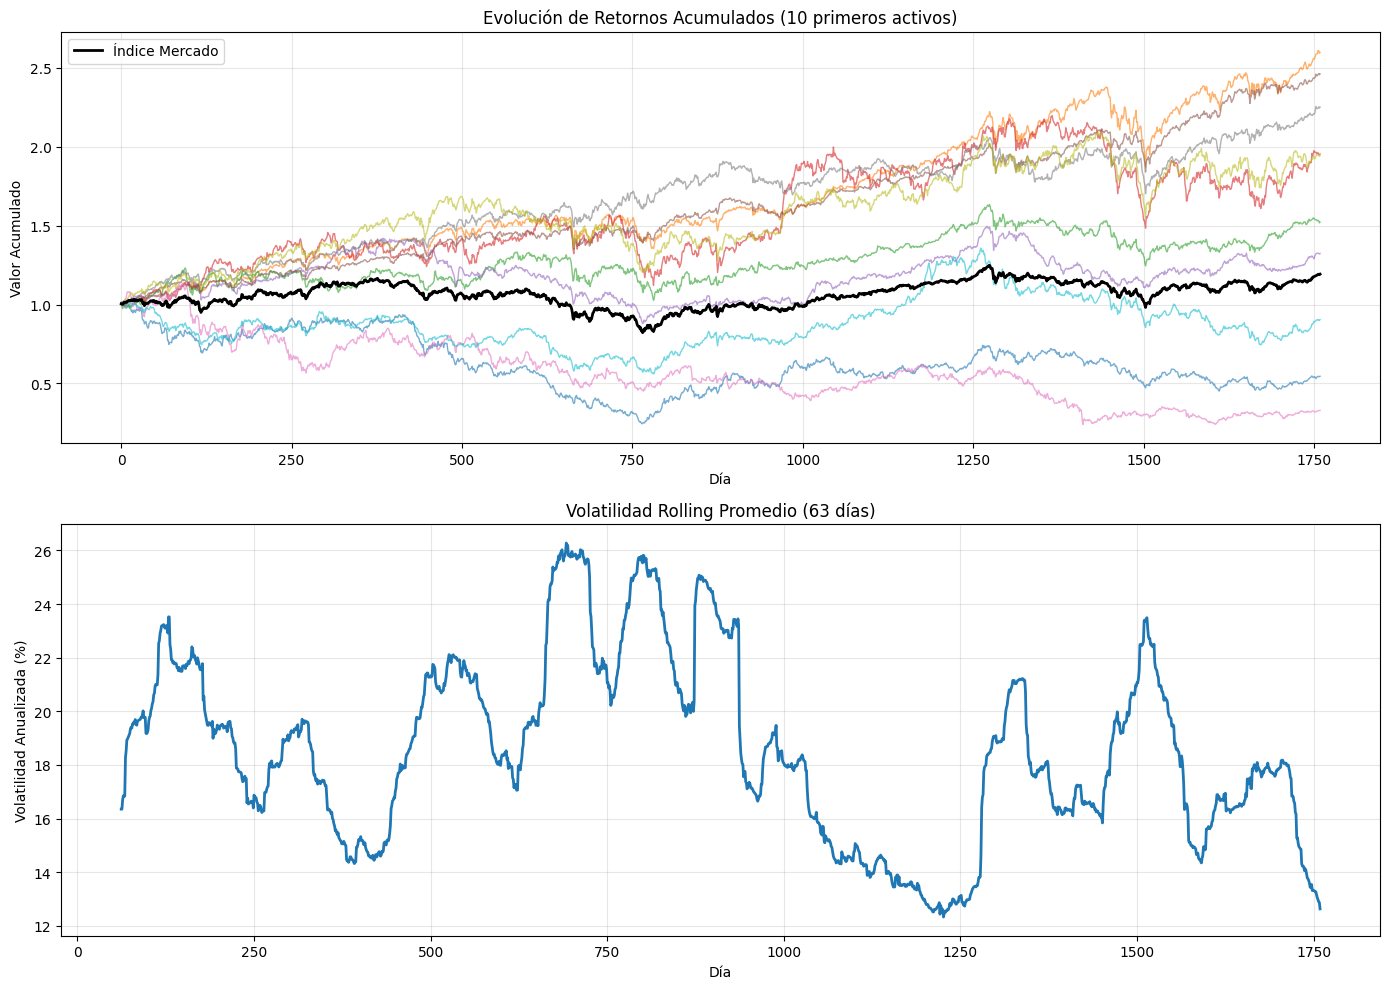

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Retornos acumulados (primeros 10 activos)
ret_acum = analisis_temp['retornos_acumulados']
for col in ret_acum.columns[:10]:
    axes[0].plot(ret_acum.index, ret_acum[col].values, alpha=0.6, linewidth=1)
axes[0].plot(analisis_temp['indice_mercado'].index, 
             (1 + analisis_temp['indice_mercado']).cumprod().values, 
             'k-', linewidth=2, label='Índice Mercado')
axes[0].set_xlabel('Día')
axes[0].set_ylabel('Valor Acumulado')
axes[0].set_title('Evolución de Retornos Acumulados (10 primeros activos)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volatilidad rolling promedio
vol_rolling = analisis_temp['volatilidad_rolling']
vol_promedio = vol_rolling.mean(axis=1)
axes[1].plot(vol_rolling.index, vol_promedio.values * 100, linewidth=2)
axes[1].set_xlabel('Día')
axes[1].set_ylabel('Volatilidad Anualizada (%)')
axes[1].set_title('Volatilidad Rolling Promedio (63 días)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/modulo1_temporal.png', dpi=300, bbox_inches='tight')
plt.show()

## Paso 9: Preparar datos para optimización

El paso final es preparar los datos en el formato necesario para los módulos de optimización (Markowitz, etc.). Usamos la clase `PreparadorDatos` que calcula y anualiza:

- **Vector μ**: Rentabilidades esperadas anualizadas de cada activo
- **Matriz Σ**: Matriz de covarianza anualizada
- **rf**: Tasa libre de riesgo anual (2% por defecto)

In [ ]:
# Crear preparador de datos y calcular estadísticas
preparador = datos.PreparadorDatos(retornos, rf_anual=0.02)
preparador.calcular_estadisticas()

# Obtener estadísticas anualizadas para optimización
mu, Sigma, rf = preparador.obtener_estadisticas()

print("="*80)
print("DATOS PREPARADOS PARA OPTIMIZACIÓN")
print("="*80)
print(f"Vector μ (rentabilidades esperadas):")
print(f"  Shape: {mu.shape}")
print(f"  Rentabilidad promedio: {mu.mean()*100:.2f}% anual")
print(f"  Rentabilidad mínima: {mu.min()*100:.2f}% anual")
print(f"  Rentabilidad máxima: {mu.max()*100:.2f}% anual")

print(f"\nMatriz Σ (covarianza):")
print(f"  Shape: {Sigma.shape}")
print(f"  Volatilidad promedio (diagonal Σ): {np.sqrt(np.diag(Sigma)).mean()*100:.2f}% anual")
print(f"  Volatilidad mínima: {np.sqrt(np.diag(Sigma)).min()*100:.2f}% anual")
print(f"  Volatilidad máxima: {np.sqrt(np.diag(Sigma)).max()*100:.2f}% anual")

print(f"\nTasa libre de riesgo:")
print(f"  rf = {rf:.4f} ({rf*100:.2f}% anual)")

print("\n" + "="*80)
print("DATOS LISTOS PARA MÓDULOS DE OPTIMIZACIÓN")
print("="*80)

DATOS PREPARADOS PARA OPTIMIZACIÓN
Vector μ (rentabilidades esperadas):
  Shape: (50,)
  Rentabilidad promedio: 3.25% anual
  Rentabilidad mínima: -18.06% anual
  Rentabilidad máxima: 17.69% anual

Matriz Σ (covarianza):
  Shape: (50, 50)
  Volatilidad promedio (diagonal Σ): 19.09% anual
  Volatilidad mínima: 10.36% anual
  Volatilidad máxima: 38.28% anual

Tasa libre de riesgo:
  rf = 0.0200 (2.00% anual)

DATOS LISTOS PARA MÓDULOS DE OPTIMIZACIÓN


## Resumen del Módulo 1datos

El módulo `1datos` ha completado exitosamente:

1. **Carga y validación** de datos de retornos diarios
2. **Cálculo de estadísticas básicas** por activo (media, volatilidad, Sharpe histórico)
3. **Análisis de correlaciones** entre activos
4. **Análisis temporal** de retornos y volatilidad
5. **Preparación de datos** para optimización (vectores μ y matriz Σ anualizados)

Los datos están listos para ser usados en los módulos siguientes:
- **Módulo 2**: Análisis de carteras equiponderadas y diversificación
- **Módulo 3**: Optimización de Markowitz